In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the numpy and pandas libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_rows",None)        # used to display all the rows
pd.set_option("display.max_columns",None)     # used to display all the columns

In [3]:
# Importing all datasets
lead_data = pd.read_csv(r"C:\Users\HP\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_data.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Replacing 'Select' with NaN in the specified columns as it is as good as null value

varlist_select =  ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

lead_data[varlist_select] = lead_data[varlist_select].replace('Select', np.nan)

In [8]:
#Removing id, lead_number of columns which have only single values as they do not add any value
lead_data.drop(['Prospect ID','Lead Number','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], inplace=True, axis =1)

In [9]:
lead_data.shape

(9240, 30)

In [10]:
((lead_data.isnull().sum())/len(lead_data))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [11]:
#Drop columns having more than 45% missing values
lead_data.drop(['How did you hear about X Education','Lead Quality','Lead Profile', 'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'], inplace = True, axis = 1)


In [12]:
((lead_data.isnull().sum())/len(lead_data))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [13]:
# Lets make the missing value as Unknown for columns having more than 5% missing values
for i in lead_data.columns:
    if ((lead_data[i].isnull().sum())/len(lead_data))*100 > 5:
        lead_data[i] = lead_data[i].fillna('Unknown')

lead_data.Country.value_counts()

Country
India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [14]:
lead_data.Specialization.value_counts()

Specialization
Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [15]:
lead_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Unknown                      2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [16]:
#This attribute does not seem to add any value as 99% have same value  - rest only 3 records have different value
lead_data.drop(['What matters most to you in choosing a course'] , axis = 1, inplace = True)

In [17]:
lead_data['Tags'].value_counts()

Tags
Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [18]:
lead_data.City.value_counts()

City
Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [19]:
((lead_data.isnull().sum())/len(lead_data))*100

Lead Origin                               0.000000
Lead Source                               0.389610
Do Not Email                              0.000000
Do Not Call                               0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Country                                   0.000000
Specialization                            0.000000
What is your current occupation           0.000000
Search                                    0.000000
Newspaper Article                         0.000000
X Education Forums                        0.000000
Newspaper                                 0.000000
Digital Advertisement                     0.000000
Through Recommendations                   0.000000
Tags                                      0.000000
City                           

In [20]:
#Identify value_counts for all remaining columns 
for i in lead_data.columns:
    print(lead_data[i].value_counts())


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
Converted
0    5679
1    3561
Name: count, dtype: int64
TotalVisits
0.0      2189
2.0      16

In [21]:
#dropping columns which have almost 95% and above occupied by a single value - Thus making not much significance in helping to acheive target
lead_data.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Through Recommendations', 'Digital Advertisement'], inplace = True, axis = 1)

In [22]:
lead_data.isnull().sum()/len(lead_data)*100

Lead Origin                               0.000000
Lead Source                               0.389610
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Country                                   0.000000
Specialization                            0.000000
What is your current occupation           0.000000
Tags                                      0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [23]:
#for columns having less than 5% missing values - we can use mode to fill up the mssing value

for i in ['Lead Source','TotalVisits','Page Views Per Visit','Last Activity']:
    lead_data[i]= lead_data[i].fillna(lead_data[i].mode()[0])

lead_data.isnull().sum()/len(lead_data)*100

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [24]:
lead_data.shape

(9240, 15)

In [25]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Country                                 9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

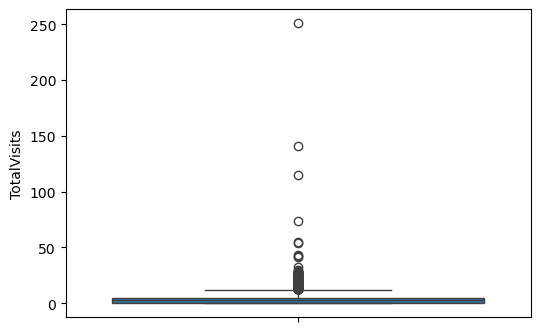

In [26]:
# Plotting box plot for Totalvisits, Page Views per visit and Total Time Spent on Website 

plt.figure(figsize = (6,4))
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

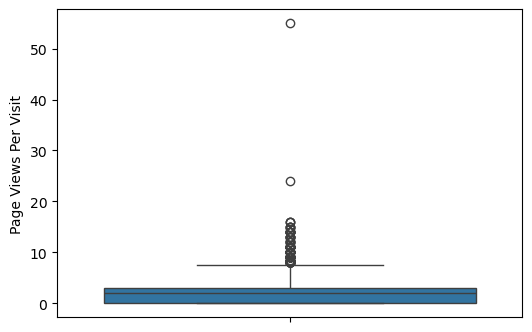

In [27]:
# Plotting box plot for Totalvisits, Page Views per visit and Total Time Spent on Website 

plt.figure(figsize = (6,4))
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

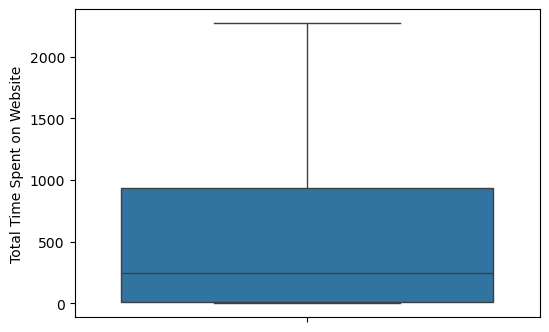

In [28]:
# Plotting box plot for Totalvisits, Page Views per visit and Total Time Spent on Website 

plt.figure(figsize = (6,4))
sns.boxplot(y=lead_data['Total Time Spent on Website'])
plt.show()

In [29]:
#Outlier Handling needed for the below 2 Totalvisits, Page Views per visit - 
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [30]:
lead_data['TotalVisits'].where(lead_data['TotalVisits'] == 251).count()

1

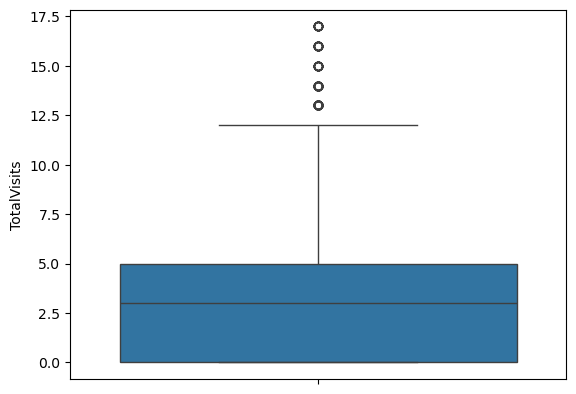

In [31]:
Q3 = lead_data.TotalVisits.quantile(0.99)
lead_data = lead_data[(lead_data.TotalVisits <= Q3)]
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

In [32]:
lead_data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9157.000000
mean        2.302302
std         2.066450
min         0.000000
5%          0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [33]:
for i in lead_data.columns:
    print(lead_data[i].value_counts())

Lead Origin
Landing Page Submission    4820
API                        3564
Lead Add Form               717
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2886
Direct Traffic       2512
Olark Chat           1753
Organic Search       1125
Reference             533
Welingak Website      142
Referral Sites        123
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
Do Not Email
No     8440
Yes     717
Name: count, dtype: int64
Converted
0    5632
1    3525
Name: count, dtype: int64
TotalVisits
0.0     2326
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      

In [34]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [35]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9157 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9157 non-null   object 
 1   Lead Source                             9157 non-null   object 
 2   Do Not Email                            9157 non-null   int64  
 3   Converted                               9157 non-null   int64  
 4   TotalVisits                             9157 non-null   float64
 5   Total Time Spent on Website             9157 non-null   int64  
 6   Page Views Per Visit                    9157 non-null   float64
 7   Last Activity                           9157 non-null   object 
 8   Country                                 9157 non-null   object 
 9   Specialization                          9157 non-null   object 
 10  What is your current occupation         9157 non-null   object 
 

In [36]:
import pandas
from sklearn import preprocessing 

In [37]:
lead_data[['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','Tags','City','Last Notable Activity']] = lead_data[['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','Tags','City','Last Notable Activity']].apply(preprocessing.LabelEncoder().fit_transform)

In [38]:
lead_data['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00     2326
2.00     1792
3.00     1193
4.00      893
1.00      651
5.00      516
1.50      305
6.00      241
2.50      239
7.00      133
3.50       90
8.00       84
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       40
1.75       28
3.33       27
1.25       23
10.00      23
5.50       20
11.00      18
2.25       18
3.67       16
1.80       13
6.50       13
2.75       12
1.40       11
4.33        9
14.00       9
2.80        9
2.20        9
3.25        8
1.60        8
2.17        7
2.40        6
13.00       5
1.20        5
12.00       5
1.83        4
1.43        4
2.60        4
15.00       4
3.40        4
1.71        4
5.67        3
16.00       3
1.57        3
4.25        3
5.33        2
1.23        2
3.75        2
1.38        2
1.22        2
7.50        2
1.78        2
1.56        2
3.20        2
2.83        2
1.27        1
8.50        1
1.14        1
1.45        1
1.86        1
2.29        1
1.21        1
1.31        1
2.13        1

In [39]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9157 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9157 non-null   int32  
 1   Lead Source                             9157 non-null   int32  
 2   Do Not Email                            9157 non-null   int64  
 3   Converted                               9157 non-null   int64  
 4   TotalVisits                             9157 non-null   float64
 5   Total Time Spent on Website             9157 non-null   int64  
 6   Page Views Per Visit                    9157 non-null   float64
 7   Last Activity                           9157 non-null   int32  
 8   Country                                 9157 non-null   int32  
 9   Specialization                          9157 non-null   int32  
 10  What is your current occupation         9157 non-null   int32  
 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)

X.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,0,6,0,0.0,0,0.0,10,36,18,4,8,6,0,8
1,0,7,0,5.0,674,2.5,5,12,18,4,14,6,0,4
2,1,1,0,2.0,1532,2.0,5,12,1,3,20,0,1,4
3,1,1,0,1.0,305,1.0,13,12,11,4,14,0,0,8
4,1,3,0,2.0,1428,1.0,1,12,18,4,20,0,0,8


In [42]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [100]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9157 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9157 non-null   int32  
 1   Lead Source                             9157 non-null   int32  
 2   Do Not Email                            9157 non-null   int64  
 3   TotalVisits                             9157 non-null   float64
 4   Total Time Spent on Website             9157 non-null   int64  
 5   Page Views Per Visit                    9157 non-null   float64
 6   Last Activity                           9157 non-null   int32  
 7   Country                                 9157 non-null   int32  
 8   Specialization                          9157 non-null   int32  
 9   What is your current occupation         9157 non-null   int32  
 10  Tags                                    9157 non-null   int32  
 

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler = MinMaxScaler()

X_train[['Lead Origin','Lead Source','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Last Activity','Country','Specialization','What is your current occupation','Tags','City','Last Notable Activity']] = scaler.fit_transform(X_train[['Lead Origin','Lead Source','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Last Activity','Country','Specialization','What is your current occupation','Tags','City','Last Notable Activity']])

X_train.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
6490,0.00,0.15,0,0.058824,0.014376,0.06250,0.0625,0.315789,1.000000,0.666667,0.000000,1.0,0,0.571429
4026,0.00,0.15,1,0.176471,0.076370,0.09375,0.7500,0.315789,1.000000,0.666667,0.692308,1.0,0,0.857143
6453,0.25,0.05,0,0.705882,0.185984,0.37500,0.7500,0.315789,0.888889,0.666667,0.038462,0.0,1,0.857143
8949,0.25,0.15,0,0.352941,0.072327,0.09375,0.3125,0.315789,0.888889,0.666667,0.769231,0.5,0,0.285714
6467,0.25,0.15,0,0.647059,0.030099,0.68750,0.7500,0.315789,0.222222,0.666667,0.538462,0.0,1,0.857143


In [109]:
### Checking the conversion Rate
converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

38.49514032980233

In [48]:
#Almost 38% leads are getting converted

In [110]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3070.9
Date:                Sun, 19 Jan 2025   Deviance:                       6141.7
Time:                        20:32:35   Pearson chi2:                 6.75e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3137
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.1341      0.274    -15.104      0.000      -4.670      -3.598
Lead Origin                                2.5129      0.252      9.989      0.000       2.020       3.006
Lead Source                                2.9631      0.272     10.912      0.000       2.431       3.495
Do Not Email                              -1.5248      0.146    -10.414      0.000      -1.812      -1.238
TotalVisits                                0.8871      0.278      3.194      0.001       0.343       1.432
Total Time Spent on Website                4.7443      0.160     29.694      0.000       4.431       5.057
Page Views Per Visit                      -2.1403      0.392     -5.455      0.000      -2.909      -1.371
Last Activity                              1.4175      0.235      6.030      0.000       0.957       1.878
Country                                    1.7033      0.179      9.510      0.000       1.352       2.054
Specialization                            -0.9686      0.125     -7.735      0.000      -1.214      -0.723
What is your current occupation           -0.8010      0.280     -2.858      0.004      -1.350      -0.252
Tags                                       1.7923      0.144     12.448      0.000       1.510       2.074
City                                      -0.0458      0.110     -0.417      0.677      -0.261       0.170
A free copy of Mastering The Interview    -0.4192      0.082     -5.106      0.000      -0.580      -0.258
Last Notable Activity                      0.8740      0.228      3.835      0.000       0.427       1.321
==========================================================================================================
"""

In [111]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [112]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [113]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', True, 1),
 ('Specialization', True, 1),
 ('What is your current occupation', False, 2),
 ('Tags', True, 1),
 ('City', False, 5),
 ('A free copy of Mastering The Interview', False, 4),
 ('Last Notable Activity', True, 1)]

In [114]:
#We can drop City as GLM and RFE both suggest that it has less value
X_train.drop('City', inplace = True, axis = 1)
X_test.drop('City', inplace = True, axis = 1)

In [115]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3070.9
Date:                Sun, 19 Jan 2025   Deviance:                       6141.9
Time:                        20:33:03   Pearson chi2:                 6.75e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3137
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.1388      0.273    -15.133      0.000      -4.675      -3.603
Lead Origin                                2.5497      0.236     10.816      0.000       2.088       3.012
Lead Source                                2.9422      0.267     11.027      0.000       2.419       3.465
Do Not Email                              -1.5252      0.146    -10.413      0.000      -1.812      -1.238
TotalVisits                                0.8950      0.277      3.229      0.001       0.352       1.438
Total Time Spent on Website                4.7424      0.160     29.702      0.000       4.429       5.055
Page Views Per Visit                      -2.1312      0.392     -5.441      0.000      -2.899      -1.364
Last Activity                              1.4172      0.235      6.029      0.000       0.956       1.878
Country                                    1.6940      0.178      9.534      0.000       1.346       2.042
Specialization                            -0.9863      0.118     -8.370      0.000      -1.217      -0.755
What is your current occupation           -0.8113      0.279     -2.906      0.004      -1.359      -0.264
Tags                                       1.7937      0.144     12.461      0.000       1.512       2.076
A free copy of Mastering The Interview    -0.4125      0.080     -5.124      0.000      -0.570      -0.255
Last Notable Activity                      0.8708      0.228      3.824      0.000       0.424       1.317
==========================================================================================================
"""

In [116]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6490    0.016050
4026    0.055020
6453    0.113398
8949    0.195898
6467    0.158984
3481    0.023156
2209    0.566679
1608    0.414895
2969    0.090898
8560    0.245436
dtype: float64

In [117]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01604962, 0.05502044, 0.11339764, 0.19589776, 0.1589845 ,
       0.02315636, 0.56667871, 0.41489456, 0.09089838, 0.24543647])

In [118]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_id
0,0,0.016050,6490
1,1,0.055020,4026
2,1,0.113398,6453
3,1,0.195898,8949
4,0,0.158984,6467


In [119]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_id,predicted
0,0,0.016050,6490,0
1,1,0.055020,4026,0
2,1,0.113398,6453,0
3,1,0.195898,8949,0
4,0,0.158984,6467,0


In [120]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3440  489]
 [ 903 1577]]


In [121]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7828054298642534


In [122]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation,21.68
12,Last Notable Activity,15.64
6,Last Activity,12.88
7,Country,9.09
10,Tags,7.31
8,Specialization,6.39
5,Page Views Per Visit,5.56
3,TotalVisits,5.13
1,Lead Source,4.63
0,Lead Origin,3.03


In [123]:
X_train = X_train.drop(['What is your current occupation'], axis = 1)
X_train.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [124]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6396
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3075.2
Date:                Sun, 19 Jan 2025   Deviance:                       6150.3
Time:                        20:33:30   Pearson chi2:                 6.74e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3128
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.6856      0.201    -23.353      0.000      -5.079      -4.292
Lead Origin                                2.5772      0.235     10.959      0.000       2.116       3.038
Lead Source                                2.9214      0.266     10.974      0.000       2.400       3.443
Do Not Email                              -1.5142      0.146    -10.366      0.000      -1.801      -1.228
TotalVisits                                0.8972      0.277      3.242      0.001       0.355       1.440
Total Time Spent on Website                4.7373      0.159     29.703      0.000       4.425       5.050
Page Views Per Visit                      -2.1091      0.391     -5.394      0.000      -2.875      -1.343
Last Activity                              1.4039      0.234      5.987      0.000       0.944       1.863
Country                                    1.6753      0.177      9.449      0.000       1.328       2.023
Specialization                            -0.9756      0.118     -8.292      0.000      -1.206      -0.745
Tags                                       1.7036      0.141     12.088      0.000       1.427       1.980
A free copy of Mastering The Interview    -0.4159      0.080     -5.172      0.000      -0.574      -0.258
Last Notable Activity                      0.8860      0.227      3.897      0.000       0.440       1.332
==========================================================================================================
"""

In [125]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_id'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_id,predicted
6490,0,0.016129,6490,0
4026,1,0.052451,4026,0
6453,1,0.114258,6453,0
8949,1,0.185829,8949,0
6467,0,0.153948,6467,0


In [126]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3434  495]
 [ 922 1558]]


In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7789046653144016


In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity,14.97
6,Last Activity,12.85
7,Country,7.79
9,Tags,5.98
8,Specialization,5.65
5,Page Views Per Visit,5.41
3,TotalVisits,5.02
1,Lead Source,4.63
0,Lead Origin,2.94
4,Total Time Spent on Website,2.16


In [129]:
X_train = X_train.drop(['Last Notable Activity'], axis = 1)
X_train.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Tags',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [130]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6397
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3082.7
Date:                Sun, 19 Jan 2025   Deviance:                       6165.4
Time:                        20:33:41   Pearson chi2:                 6.73e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3112
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.5016      0.194    -23.154      0.000      -4.883      -4.121
Lead Origin                                2.5905      0.235     11.031      0.000       2.130       3.051
Lead Source                                2.9261      0.266     10.989      0.000       2.404       3.448
Do Not Email                              -1.4554      0.146     -9.979      0.000      -1.741      -1.170
TotalVisits                                0.8009      0.275      2.914      0.004       0.262       1.340
Total Time Spent on Website                4.7525      0.159     29.847      0.000       4.440       5.065
Page Views Per Visit                      -2.1570      0.390     -5.528      0.000      -2.922      -1.392
Last Activity                              2.1321      0.147     14.528      0.000       1.844       2.420
Country                                    1.6211      0.177      9.175      0.000       1.275       1.967
Specialization                            -0.9722      0.117     -8.281      0.000      -1.202      -0.742
Tags                                       1.6798      0.141     11.955      0.000       1.404       1.955
A free copy of Mastering The Interview    -0.4170      0.080     -5.193      0.000      -0.574      -0.260
==========================================================================================================
"""

In [131]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_id'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_id,predicted
6490,0,0.012019,6490,0
4026,1,0.051448,4026,0
6453,1,0.102201,6453,0
8949,1,0.200247,8949,0
6467,0,0.135360,6467,0


In [132]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3431  498]
 [ 931 1549]]


In [133]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7770322983304728


In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Country,7.78
9,Tags,5.94
8,Specialization,5.49
5,Page Views Per Visit,5.41
6,Last Activity,5.36
3,TotalVisits,5.01
1,Lead Source,4.62
0,Lead Origin,2.89
4,Total Time Spent on Website,2.13
10,A free copy of Mastering The Interview,1.88


In [135]:
X_train = X_train.drop(['Country'], axis = 1)
X_train.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Tags', 'A free copy of Mastering The Interview'],
      dtype='object')

In [136]:
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6398
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3125.5
Date:                Sun, 19 Jan 2025   Deviance:                       6251.1
Time:                        20:33:49   Pearson chi2:                 6.77e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3019
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -3.6635      0.167    -21.982      0.000      -3.990      -3.337
Lead Origin                                2.7375      0.232     11.783      0.000       2.282       3.193
Lead Source                                3.7502      0.249     15.071      0.000       3.262       4.238
Do Not Email                              -1.4466      0.144    -10.036      0.000      -1.729      -1.164
TotalVisits                                0.2840      0.266      1.067      0.286      -0.238       0.806
Total Time Spent on Website                4.3178      0.148     29.107      0.000       4.027       4.609
Page Views Per Visit                      -3.2303      0.376     -8.590      0.000      -3.967      -2.493
Last Activity                              2.1841      0.144     15.133      0.000       1.901       2.467
Specialization                            -0.8068      0.114     -7.065      0.000      -1.031      -0.583
Tags                                       1.6932      0.139     12.162      0.000       1.420       1.966
A free copy of Mastering The Interview    -0.4532      0.079     -5.763      0.000      -0.607      -0.299
==========================================================================================================
"""

In [137]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_id'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_id,predicted
6490,0,0.019949,6490,0
4026,1,0.078199,4026,0
6453,1,0.078228,6453,0
8949,1,0.261323,8949,0
6467,0,0.082685,6467,0


In [138]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3424  505]
 [ 931 1549]]


In [139]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7759400842565143


In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags,5.59
5,Page Views Per Visit,5.16
6,Last Activity,5.11
3,TotalVisits,4.94
7,Specialization,4.43
1,Lead Source,3.71
0,Lead Origin,2.70
4,Total Time Spent on Website,2.07
9,A free copy of Mastering The Interview,1.87
2,Do Not Email,1.10


In [141]:
X_train = X_train.drop(['TotalVisits'], axis = 1)
X_train.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Tags', 'A free copy of Mastering The Interview'],
      dtype='object')

In [142]:
X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6399
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3126.1
Date:                Sun, 19 Jan 2025   Deviance:                       6252.2
Time:                        20:33:56   Pearson chi2:                 6.78e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3018
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -3.6436      0.165    -22.020      0.000      -3.968      -3.319
Lead Origin                                2.7223      0.232     11.736      0.000       2.268       3.177
Lead Source                                3.7483      0.249     15.064      0.000       3.261       4.236
Do Not Email                              -1.4506      0.144    -10.066      0.000      -1.733      -1.168
Total Time Spent on Website                4.3372      0.147     29.440      0.000       4.048       4.626
Page Views Per Visit                      -2.9704      0.286    -10.395      0.000      -3.530      -2.410
Last Activity                              2.1877      0.144     15.166      0.000       1.905       2.470
Specialization                            -0.8161      0.114     -7.165      0.000      -1.039      -0.593
Tags                                       1.6884      0.139     12.138      0.000       1.416       1.961
A free copy of Mastering The Interview    -0.4464      0.078     -5.695      0.000      -0.600      -0.293
==========================================================================================================
"""

In [143]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_id'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_id,predicted
6490,0,0.020154,6490,0
4026,1,0.076871,4026,0
6453,1,0.072494,6453,0
8949,1,0.248144,8949,0
6467,0,0.083918,6467,0


In [144]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7760961148385084


In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags,5.59
5,Last Activity,5.08
6,Specialization,4.43
1,Lead Source,3.70
0,Lead Origin,2.70
4,Page Views Per Visit,2.59
3,Total Time Spent on Website,2.02
8,A free copy of Mastering The Interview,1.85
2,Do Not Email,1.10


In [146]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

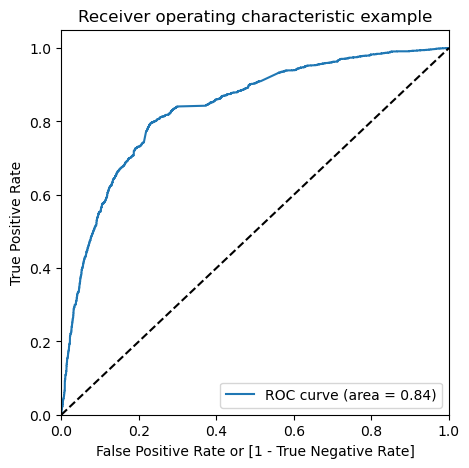

In [148]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [149]:
from sklearn.metrics import precision_score, recall_score

In [150]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7540106951871658

In [151]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6254032258064516

In [152]:
from sklearn.metrics import precision_recall_curve

In [153]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(6490    0
 4026    1
 6453    1
 8949    1
 6467    0
 3481    0
 2209    0
 1608    0
 2969    0
 8560    0
 8558    0
 8901    0
 3301    0
 2925    1
 5357    0
 2293    0
 7995    0
 2734    1
 563     1
 941     1
 4646    1
 7576    0
 8263    0
 8701    1
 6680    0
 8473    1
 2459    0
 545     0
 456     0
 5562    1
 6904    0
 6992    0
 7655    0
 6183    0
 1420    0
 4778    0
 8361    0
 5511    0
 4741    0
 4015    0
 8340    0
 9184    0
 7177    1
 300     0
 3789    1
 8077    1
 8440    0
 7996    1
 3083    1
 1915    1
 1519    0
 5622    0
 7565    1
 6257    1
 294     0
 3505    0
 1016    0
 5249    0
 3581    0
 5776    0
 8785    1
 6436    0
 4193    0
 42      0
 238     1
 8298    0
 6112    1
 2282    0
 6823    1
 7727    0
 6534    1
 6336    0
 7910    1
 2203    0
 817     0
 2934    0
 6374    0
 5339    1
 359     0
 5344    0
 978     0
 4297    1
 6595    0
 8047    1
 1235    0
 2935    1
 7248    0
 6745    0
 4434    0
 1204    0
 1382    0

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

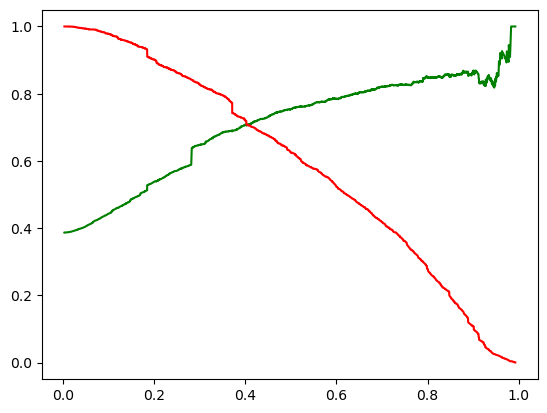

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [156]:
X_test.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [106]:
X_test[['Lead Origin','Lead Source','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Last Activity','Country','Specialization','What is your current occupation','Tags','City','Last Notable Activity']] = scaler.transform(X_test[['Lead Origin','Lead Source','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Last Activity','Country','Specialization','What is your current occupation','Tags','City','Last Notable Activity']])

In [107]:
X_test.head(30)

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
7359,0.25,0.05,1,0.176471,0.167116,0.187500,0.7500,0.315789,0.722222,0.666667,1.000000,0.000000,1,0.857143
2201,0.25,0.05,0,0.294118,0.057951,0.156250,0.5625,0.315789,0.500000,0.666667,0.307692,0.000000,0,0.571429
2473,0.25,0.05,1,0.529412,0.582210,0.140625,0.7500,0.315789,0.611111,1.000000,0.769231,0.000000,0,0.857143
8388,0.25,0.05,0,0.058824,0.057053,0.062500,0.0625,0.315789,0.500000,0.666667,0.307692,0.000000,1,0.571429
2949,0.25,0.15,0,0.235294,0.097484,0.125000,0.0625,0.315789,0.222222,0.666667,0.961538,0.000000,1,0.571429
8144,0.25,0.05,0,0.117647,0.031447,0.125000,0.1875,0.315789,0.000000,0.666667,0.769231,0.166667,1,0.142857
8443,0.00,0.30,0,0.000000,0.000000,0.000000,0.3125,0.947368,0.055556,0.666667,0.769231,0.500000,0,0.285714
290,0.00,0.30,0,0.000000,0.000000,0.000000,0.5625,0.947368,1.000000,0.833333,0.692308,1.000000,0,0.571429
8626,0.25,0.05,0,0.117647,0.054807,0.125000,0.7500,0.315789,0.000000,0.666667,0.538462,0.000000,1,0.857143
5709,0.00,0.15,0,0.176471,0.230907,0.187500,0.7500,0.315789,1.000000,0.833333,0.692308,1.000000,0,0.857143


In [158]:
X_test = X_test[['Lead Origin','Lead Source', 'Do Not Email','Total Time Spent on Website','Page Views Per Visit','Last Activity','Specialization','Tags','A free copy of Mastering The Interview']]

In [157]:
X_train.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Tags', 'A free copy of Mastering The Interview'],
      dtype='object')

In [159]:
X_test.head()

,Lead Origin,Lead Source,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,A free copy of Mastering The Interview
7359,0.25,0.05,1,0.167116,0.187500,0.7500,0.722222,1.000000,1
2201,0.25,0.05,0,0.057951,0.156250,0.5625,0.500000,0.307692,0
2473,0.25,0.05,1,0.582210,0.140625,0.7500,0.611111,0.769231,0
8388,0.25,0.05,0,0.057053,0.062500,0.0625,0.500000,0.307692,1
2949,0.25,0.15,0,0.097484,0.125000,0.0625,0.222222,0.961538,1


In [160]:
X_test_sm = sm.add_constant(X_test)

In [161]:
y_test_pred = res.predict(X_test_sm)

In [162]:
y_test_pred[:10]

7359    0.146165
2201    0.161603
2473    0.579824
8388    0.051563
2949    0.228497
8144    0.148306
8443    0.358472
290     0.281765
8626    0.308805
5709    0.344516
dtype: float64

In [163]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [164]:
# Let's see the head
y_pred_1.columns

RangeIndex(start=0, stop=1, step=1)

In [165]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [166]:
# Putting CustID to index
y_test_df['LeadId'] = y_test_df.index

In [167]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [168]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [169]:
y_pred_final.head()

,Converted,LeadId,0
0,0,7359,0.146165
1,0,2201,0.161603
2,1,2473,0.579824
3,0,8388,0.051563
4,0,2949,0.228497


In [170]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [171]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadId','Converted','Converted_Prob'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [172]:
# Let's see the head of y_pred_final
y_pred_final

,Converted,LeadId,Converted_Prob
0,0,7359,0.146165
1,0,2201,0.161603
2,1,2473,0.579824
3,0,8388,0.051563
4,0,2949,0.228497
5,1,8144,0.148306
6,1,8443,0.358472
7,0,290,0.281765
8,0,8626,0.308805
9,0,5709,0.344516


In [173]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [174]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob,final_predicted
0,0,7359,0.146165,0
1,0,2201,0.161603,0
2,1,2473,0.579824,1
3,0,8388,0.051563,0
4,0,2949,0.228497,0


In [175]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7692867540029112